## Ковариация (корреляционный момент) (covariance)

Ковариация является мерой зависимости двух случайных величин. Для двух случайных величин, определенных на одном и том же вероятностном пространстве ковариация определяется следующим образом:
$$ \mathrm{cov}(X,Y) = \mathrm E[(X - \mathrm E(X))(Y - \mathrm E(Y))] $$
где $\mathrm E$ - математическое ожидание.


Создадим для начала две случайные величины, которые будут коррелировать, в виде наборов исходов испытаний.

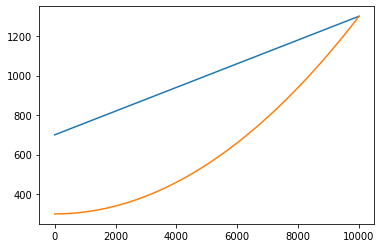

In [ ]:
# для начала зададим значения X и Y функциями:
sample_size = 10000

X = np.empty(sample_size)
Y = np.empty(sample_size)
for i in range(sample_size):
    x = i / 100
    X[i] = 6 * x  + 700
    Y[i] = 0.1 * (x**2) + 300

plt.plot(X)
plt.plot(Y)
plt.show()

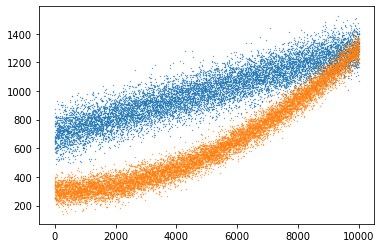

In [ ]:
# внесем шум
for i in range(len(X)):
    X[i] += np.random.normal(scale=80)
    Y[i] += np.random.normal(scale=50)

plt.scatter(range(10000), X, s=0.1)
plt.scatter(range(10000), Y, s=0.1)

Text(0, 0.5, 'Y')

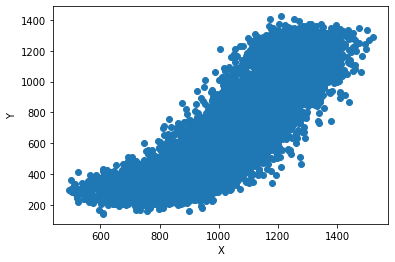

In [ ]:
# перетосуем массивы X и Y единым образом:
from sklearn import utils

X, Y = utils.shuffle(X, Y)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

На диаграмме можно заметить, что высокми значениям X соответствуют преимущественно высокие значения Y, что говорит по положительной корреяции этих случайных величин.<br>

#### Выборочная ковариация

Ковариация, оцениваемая эмпирически на основе данных выборки
$$ \sigma_{XY} = \mathrm{cov}(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y) = \frac{1}{n} \sum_{i=1}^n x_i \space y_i - \overline x \space \overline y$$
Заметим, что ковариация случайной величины между собой есть дисперсия:
$$ \mathrm{cov}(X,X) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 = \sigma_X^2 = \sigma_{XX}$$
По аналогии с исправленной дисперсией, можно рассматривать исправленную ковариацию, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [ ]:
def cov(X, Y):
    return sum((X - X.mean()) * (Y - Y.mean())) / len(X)

print(f"{cov(X, Y) = }     ковариация между X и Y ")
print(f"{cov(Y, X) = }     ковариация между Y и X ")
print(f"{var(X)    = }     дисперсия X ")
print(f"{var(Y)    = }     дисперсия Y ")

np.cov(X, Y)

cov(X, Y) = 49796.64796452851     ковариация между X и Y 
cov(Y, X) = 49796.64796452851     ковариация между Y и X 
var(X)    = 36593.47638297169     дисперсия X 
var(Y)    = 90675.6698321705     дисперсия Y 


array([[36597.13609658, 49801.62812734],
       [49801.62812734, 90684.738306  ]])

#### Коэффициент корреляции
По абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений случайных величин. Полученная величина называется коэффициентом корреляции Пирсона (Pearson correlation coefficient (PCC))
$$ \mathbf r_{XY} = \frac {\sigma_{XY}}{\sigma_X \sigma_Y} $$
Коэффициент корреляции находится в интервале от -1 до 1. Две случайные величины являются коррелированнями, если $\sigma_{XY}$ или $\mathbf r_{XY}$ отличны от нуля. При $\mathbf r_{XY} > 0$ имеет место положительная корреляция, а при $\mathbf r_{XY} < 0$ - отрицательная корреляция.

In [ ]:
def r(X, Y):
    sigma_XY = cov(X, Y)
    sigma_X = np.sqrt(var(X))
    sigma_Y = np.sqrt(var(Y))
    return sigma_XY / (sigma_X * sigma_Y)

print(f"{r(X, Y) = }")
print(f"{r(Y, X) = }")
print(f"{r(X, X) = }")
print(f"{r(Y, Y) = }")
np.corrcoef(X, Y)

r(X, Y) = 0.8644758960936819
r(Y, X) = 0.8644758960936819
r(X, X) = 1.0000000000000002
r(Y, Y) = 1.0


array([[1.       , 0.8644759],
       [0.8644759, 1.       ]])

### Ковариационная матрица

При представлении данных буквой $\mathbf X$ обычно обозначают матрицу $ n \times d $ строки которй представляют $n$ объектов, описываемые $d$ признаками. $\mathbf x_r$ обозначает $r$-ую строку $\mathbf X$, $\mathbf x_c$ - $c$-ую колонку, а $x_{rc}$ - элемент на пересечении $r$-ой строки и $c$-ой колонки. Каждую колонку этой матрицы можно рассматривать как набор исходов случайной величины.

In [ ]:
X = np.array([  [2., 3.2, 5.1],
                [4., 3.3, 5.3],
                [2., 3.1, 5.4],
                [4., 3.1, 5.3],
                [6., 3.0, 5.6],
                [8., 3.1, 5.7]    ])

n, d = X.shape

Среднее по $j$-му столбцу (эмпирическая оценка математического ожидания) определяется формулой
$$\mu_j = \frac{1}{n} \sum_{i=1}^n \mathbf x_{ij}$$
$\mu^{\mathrm T}$ обозначает вектор-строку, содержащий средние по всем столбцам. Если $\mathbf 1$ - $n$-мерный вектор, содержащий только единицы, то $\mathbf 1 \mu^{\mathrm T}$ - матрица размерности $n \times d$, строками которой являются векторы $\mu^{\mathrm T}$.

In [ ]:
mu_T = np.average(X, axis=0).reshape(1, 3)  # вектор-строка
print(f"{mu_T = }")
ones = np.ones(shape=(n,1))                 # вектор-столбец
print('shapes', ones.shape, mu_T.shape)
averages = np.matmul(ones, mu_T)
print(averages)

mu_T = array([[4.33333333, 3.13333333, 5.4       ]])
shapes (6, 1) (1, 3)
[[4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]]


Центрированная матрица (zero-centred) $ \mathbf X' = \mathbf X - \mathbf 1 \mu^{\mathrm T} $

In [ ]:
X_centered = X - averages
print(X_centered)

[[-2.33333333e+00  6.66666667e-02 -3.00000000e-01]
 [-3.33333333e-01  1.66666667e-01 -1.00000000e-01]
 [-2.33333333e+00 -3.33333333e-02  8.88178420e-16]
 [-3.33333333e-01 -3.33333333e-02 -1.00000000e-01]
 [ 1.66666667e+00 -1.33333333e-01  2.00000000e-01]
 [ 3.66666667e+00 -3.33333333e-02  3.00000000e-01]]


Матрицей разброса (scatter matrix) называется матрица $\mathbf S$ размерности $d \times d$
$$ \mathbf S = \mathbf X'^{\mathrm T} \mathbf X'= \mathbf X^{\mathrm T} \mathbf X - n \mathbf M $$
где $ \mathbf M = \mu \mu^{\mathrm T} $ - матрица $d \times d$ элементами которой являютсяпроизведения средних по столбцам $ m_{ij} = \mu_j \mu_c $.

In [ ]:
mu = mu_T.transpose()
M = np.matmul(mu, mu_T)
print(M)

[[18.77777778 13.57777778 23.4       ]
 [13.57777778  9.81777778 16.92      ]
 [23.4        16.92       29.16      ]]


In [ ]:
S = np.matmul(X_centered.transpose(), X_centered)
print(S)
S_alt = np.matmul(X.transpose(), X) - n * M
print(S_alt)

[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]
[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]


In [ ]:
# заметим, что несмотря на визуальное равенство матриц
# S и S_alt сревнение матриц дает False:
print(S == S_alt)
print(np.array_equal(S, S_alt))

[[False False False]
 [False False False]
 [False False False]]
False


In [ ]:
# это происходит в силу ошибок округления элементов типа float
# адекватное сравнение можно произвести функциями isclose и allclose:
print(np.isclose(S, S_alt))
print(np.allclose(S, S_alt))
# функцию isclose можно использовать для сравнения чисел float

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


Ковариационной матрицей матрицы $\mathbf X$ называется матрица $ \mathbf \Sigma = \frac{1}{n} \mathbf S $, элементами которой являются попарные ковариации между колонками матрицы $\mathbf X $:
$$ \sigma_{jc} = \mathrm{cov}(\mathbf x_j, \mathbf x_c) = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)(\mathbf X_{ic} - \mu_c) = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij} \mathbf X{ic} - \mu_i \mu_c \right) $$
$\sigma_{jc}$ - ковариация между колонками $j$ и $c$.<br>
$\sigma_{jj}$ - дисперсия $j$-й колонки:
$$ \sigma_{jj} = \sigma_{j}^2 = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)^2 = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij}^2 - \mu_i \right) $$

In [ ]:
cov_12 = (1/n) * np.sum((X[:, 1] - mu[1]) * (X[:, 2] - mu[2]))
print(cov_12)       # ковариация между колонками 1 и 2

-0.011666666666666672


In [ ]:
cov_matrix = np.empty(shape=(d, d))
for i in range(d):
    for j in range(d):
        cov_matrix[i, j] = cov(X[:, i], X[:, j])

cov_matrix

array([[ 4.55555556, -0.07777778,  0.36666667],
       [-0.07777778,  0.00888889, -0.01166667],
       [ 0.36666667, -0.01166667,  0.04      ]])

в отличие от нашей функции `cov` функция `cov` из numpy вычисляет исправленные ковариации, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [ ]:
np.cov(X.transpose())

array([[ 5.46666667, -0.09333333,  0.44      ],
       [-0.09333333,  0.01066667, -0.014     ],
       [ 0.44      , -0.014     ,  0.048     ]])

Ковариационная матрица является симметричной, и на пересечении $i$, $j$ этой матрицы располагаются ковариация между колонками $i$ и $j$ матрицы $\mathbf X$.